In [64]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import time
import csv
import seaborn as sns

In [65]:
tmdb_2022_df = pd.read_csv('../project-1/tmdb_movie_final_2022_full.csv')
tmdb_2021_df = pd.read_csv('../project-1/tmdb_movie_final_2021_budgets.csv')
tmdb_2020_df = pd.read_csv('../project-1/tmdb_movie_final_2020_full.csv')
tmdb_2019_df = pd.read_csv('../project-1/tmdb_movie_final_2019_full.csv')
tmdb_2018_df = pd.read_csv('../project-1/tmdb_movie_final_2018_full.csv')
tmdb_2017_df = pd.read_csv('../project-1/tmdb_movie_final_2017_full.csv')
tmdb_df = pd.read_csv('../project-1/tmdb_movie_sampleset.csv')
tmdb_2022_df

,Unnamed: 0,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,...,title,video,vote_average,vote_count,Budget,Revenue,Country,Genres,imdb_id,year
0,0,False,/bQXAqRx2Fgc46uCVWgoPz5L5Dtr.jpg,"[28, 14, 878]",436270,en,Black Adam,"Nearly 5,000 years after he was bestowed with ...",6579.615,/pFlaoHTZeyNkG83vxsAJiGzfSsa.jpg,...,Black Adam,False,7.3,2508,200000000.0,384571691.0,United States of America,Action,tt6443346,2022
1,1,False,/7zQJYV02yehWrQN6NjKsBorqUUS.jpg,"[28, 18, 36]",724495,en,The Woman King,"The story of the Agojie, the all-female unit o...",3881.892,/438QXt1E3WJWb3PqNniK0tAE5c1.jpg,...,The Woman King,False,7.9,615,50000000.0,91000000.0,Canada,Action,tt8093700,2022
2,2,False,/kmzppWh7ljL6K9fXW72bPN3gKwu.jpg,"[14, 28, 35, 80]",1013860,en,R.I.P.D. 2: Rise of the Damned,When Sheriff Roy Pulsipher finds himself in th...,2530.599,/g4yJTzMtOBUTAR2Qnmj8TYIcFVq.jpg,...,R.I.P.D. 2: Rise of the Damned,False,6.7,207,130.0,78324220.0,United States of America,Fantasy,tt21094994,2022
3,3,False,/90ZZIoWQLLEXSVm0ik3eEQBinul.jpg,"[28, 27, 53]",988233,en,Hex,Following a mysterious disappearance on a jump...,1977.125,/xFJHb43ZAnnuiDztxZYsmyopweb.jpg,...,Hex,False,5.1,13,0.0,0.0,United States of America,Action,tt6969338,2022
4,4,False,/jCY35GkjwWUmoPO9EV1lWL6kuyj.jpg,"[28, 12, 53]",855440,es,Polar,"MG, a policewoman who has been expelled from t...",1881.197,/efuKHH9LqBZB67AS87kprLgaYO8.jpg,...,Polar,False,7.5,2,0.0,0.0,Spain,Action,tt15327556,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21218,21218,False,/hOHw9uH1uWH21J4OJBqhKUPVxd4.jpg,[],460533,de,Zorn - Kalter Rauch,"In the fifth film in the series, the two chief...",1.865,/i6saFvQDiUL2zMfpU5EvkIhFCDd.jpg,...,Zorn - Kalter Rauch,False,5.7,3,0.0,0.0,Not Listed,Not Listed,tt6867514,2022
21219,21219,False,/8WvpAWydJIPIQFvtXKWLzmyAMwo.jpg,"[10770, 18, 36]",525722,it,Prima che la notte,"The life and times of Pippo Fava, a Sicilian j...",1.865,/sYQosk7M4maF2xjzt5O20Y1tS17.jpg,...,Before the Night,False,7.1,16,0.0,0.0,Italy,TV Movie,tt7066896,2022
21220,21220,False,/2lGDeYxz2RX1J5LQU7qaX8Pa9IE.jpg,"[99, 10770]",585598,fr,John Ford : l'homme qui inventa l'Amérique,Over a 50-year career and more than a hundred ...,1.865,/aXbZJTKSPhNZ2Q1ZXy2IGlmitq.jpg,...,John Ford: The Man Who Invented America,False,6.4,9,0.0,0.0,France,Documentary,tt10124964,2022
21221,21221,False,NaN,[16],1053858,en,Away from Home,A kid who lives in an African village receives...,1.865,NaN,...,Away from Home,False,0.0,0,0.0,0.0,Italy,Animation,NaN,2022


In [66]:
tmdb_new_df = tmdb_df.rename(columns={"Country":"Language"})                     

In [67]:
tmdb_precovid_df = pd.read_csv('../project-1/tmdb_movie_precovid.csv')
tmdb_covid_df = pd.read_csv('../project-1/tmdb_movie_covid.csv')

In [68]:
top_10_2022 = tmdb_2022_df.sort_values(['popularity'], ascending=False)[['title','popularity']]
top_10_2022.head(5)

,title,popularity
0,Black Adam,6579.615
1,The Woman King,3881.892
2,R.I.P.D. 2: Rise of the Damned,2530.599
3,Hex,1977.125
4,Polar,1881.197


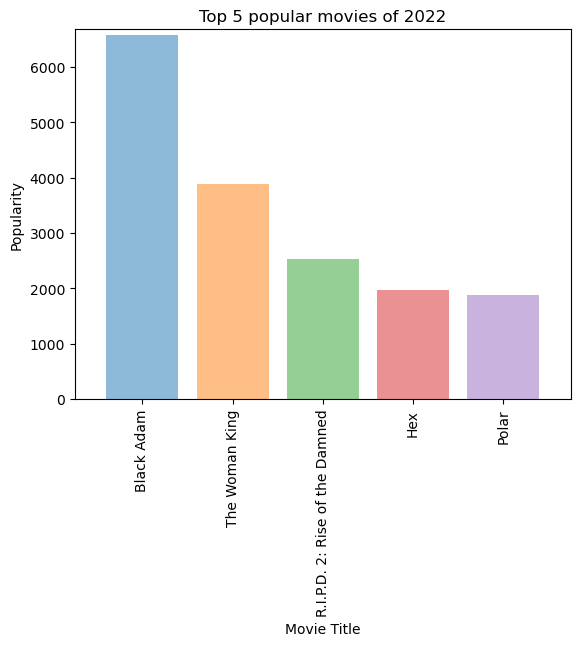

<Figure size 1500x700 with 0 Axes>

In [84]:
users = [6579,3881,2530,1977,1881]
x_axis = ["Black Adam", "The Woman King", "R.I.P.D. 2: Rise of the Damned", "Hex", "Polar"]
pie_colors = sns.color_palette('tab10')
plt.bar(x_axis, users, color = pie_colors, alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Black Adam", "The Woman King", "R.I.P.D. 2: Rise of the Damned", "Hex", "Polar"],rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+100)
plt.title("Top 5 popular movies of 2022")
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1/popularmovies2022.png")
plt.show()

In [17]:
top_10_2021 = tmdb_2021_df.sort_values(['popularity'], ascending=False)[['title','popularity']]
top_10_2021.head(5)

,title,popularity
0,Spider-Man: No Way Home,433.376
1,The Addams Family,298.037
2,Jujutsu Kaisen 0,296.557
3,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,266.452
4,Encanto,258.102


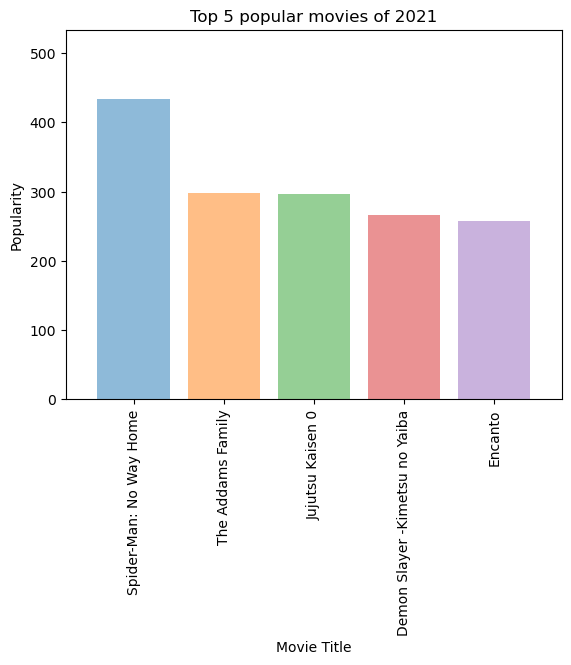

<Figure size 1500x700 with 0 Axes>

In [73]:
users = [433.376,298.037,296.557, 266.452,258.102]
x_axis = ["Spider-Man: No Way Home", "The Addams Family	", "Jujutsu Kaisen 0", "Demon Slayer -Kimetsu no Yaiba", "Encanto"]
pie_colors = sns.color_palette('tab10')
plt.bar(x_axis, users, color = pie_colors, alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Spider-Man: No Way Home", "The Addams Family", "Jujutsu Kaisen 0", "Demon Slayer -Kimetsu no Yaiba", "Encanto"], rotation= 45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+100)
plt.title("Top 5 popular movies of 2021")
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1/Figures/popularmovies2021.png")
plt.show()

In [22]:
top_10_2020 = tmdb_2020_df.sort_values(['popularity'], ascending=False)[['title','popularity']]
top_10_2020.head(5)

,title,popularity
0,Nice Sister-In-Law 2,545.569
1,The Addams Family,298.037
2,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,266.452
3,How the Grinch Stole Christmas,230.236
4,Black Panther,220.682


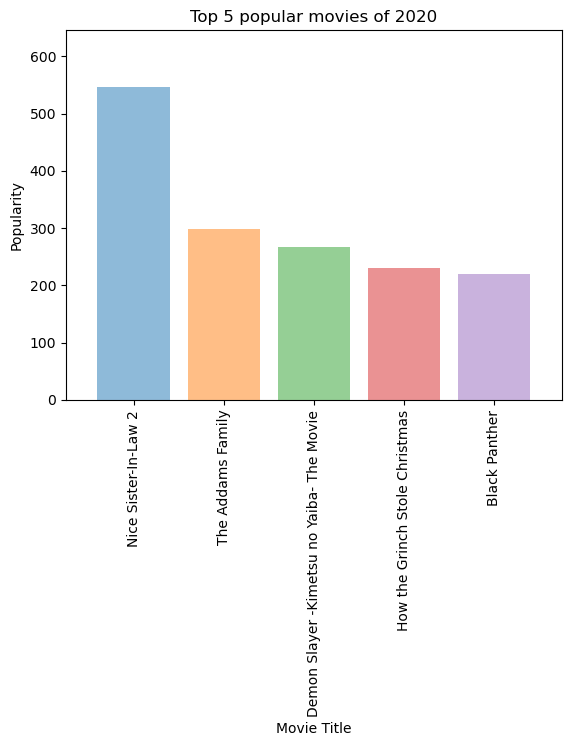

<Figure size 1500x700 with 0 Axes>

In [74]:
users = [545.569,298.037,266.452,230.236,220.682]
x_axis = ["Nice Sister-In-Law 2", "The Addams Family", "Demon Slayer -Kimetsu no Yaiba- The Movie", "How the Grinch Stole Christmas", "Black Panther"]
pie_colors = sns.color_palette('tab10')
plt.bar(x_axis, users, color = pie_colors, alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Nice Sister-In-Law 2", "The Addams Family", "Demon Slayer -Kimetsu no Yaiba- The Movie", "How the Grinch Stole Christmas", "Black Panther"],rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+100)
plt.title("Top 5 popular movies of 2020")
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1/Figures/popularmovies2020.png")
plt.show()

In [23]:
top_10_2019 = tmdb_2019_df.sort_values(['popularity'], ascending=False)[['title','popularity']]
top_10_2019.head(5)

,title,popularity
0,The Addams Family,298.037
1,How the Grinch Stole Christmas,230.236
2,Black Panther,220.682
3,Avengers: Infinity War,200.173
4,Terrifier,192.431


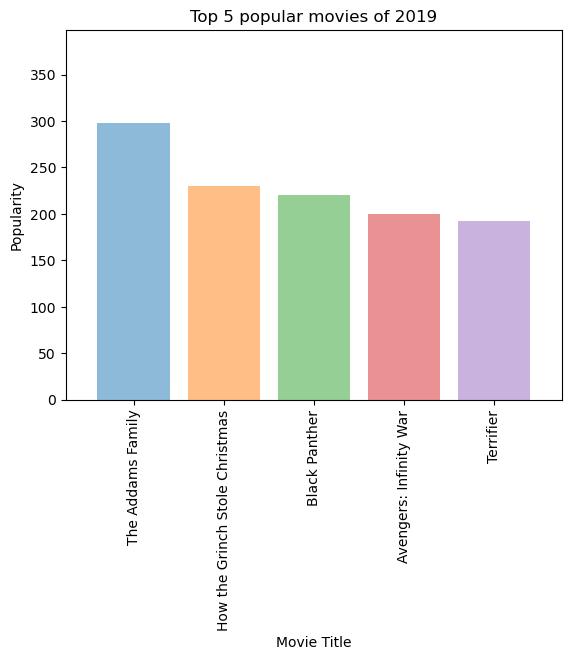

<Figure size 1500x700 with 0 Axes>

In [75]:
users = [298.037,230.236,220.682,200.173,192.431]
x_axis = ["The Addams Family", "How the Grinch Stole Christmas", "Black Panther", "Avengers: Infinity War", "Terrifier"]
pie_colors = sns.color_palette('tab10')
plt.bar(x_axis, users, color = pie_colors, alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["The Addams Family", "How the Grinch Stole Christmas", "Black Panther", "Avengers: Infinity War", "Terrifier"],rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+100)
plt.title("Top 5 popular movies of 2019")
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1/Figures/popularmovies20219.png")
plt.show()

In [24]:
top_10_2018 = tmdb_2018_df.sort_values(['popularity'], ascending=False)[['title','popularity']]
top_10_2018.head(5)

,title,popularity
0,Nice Sister-In-Law 2,545.569
1,The Addams Family,298.037
2,How the Grinch Stole Christmas,230.236
3,Black Panther,220.682
4,Avengers: Infinity War,200.173


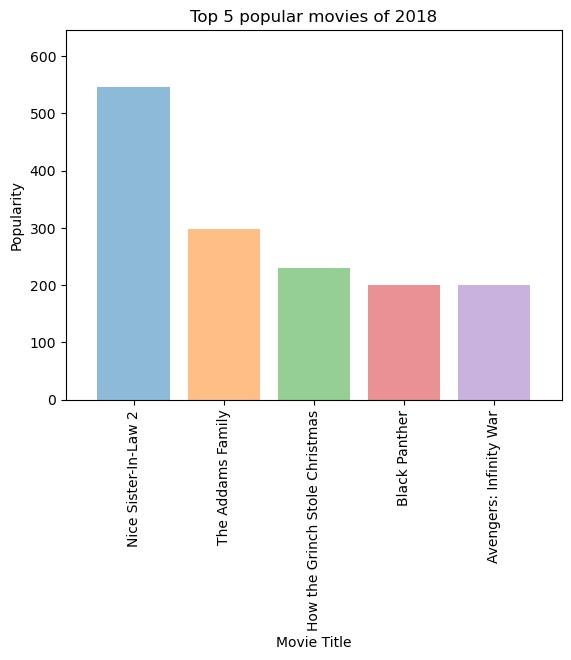

<Figure size 1500x700 with 0 Axes>

In [76]:
users = [545.569,298.037,230.236,200.682,200.173]
x_axis = ["Nice Sister-In-Law 2","The Addams Family","How the Grinch Stole Christmas", "Black Panther", "Avengers: Infinity War"]
pie_colors = sns.color_palette('tab10')
plt.bar(x_axis, users, color = pie_colors, alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Nice Sister-In-Law 2","The Addams Family","How the Grinch Stole Christmas", "Black Panther", "Avengers: Infinity War"],rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+100)
plt.title("Top 5 popular movies of 2018")
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1/Figures/popularmovies20218.png")
plt.show()

In [26]:
top_10_2017 = tmdb_2017_df.sort_values(['popularity'], ascending=False)[['title','popularity']]
top_10_2017.head(5)

,title,popularity
0,Nice Sister-In-Law 2,545.569
1,The Addams Family,298.037
2,How the Grinch Stole Christmas,230.236
3,Terrifier,192.431
4,Harry Potter and the Chamber of Secrets,182.003


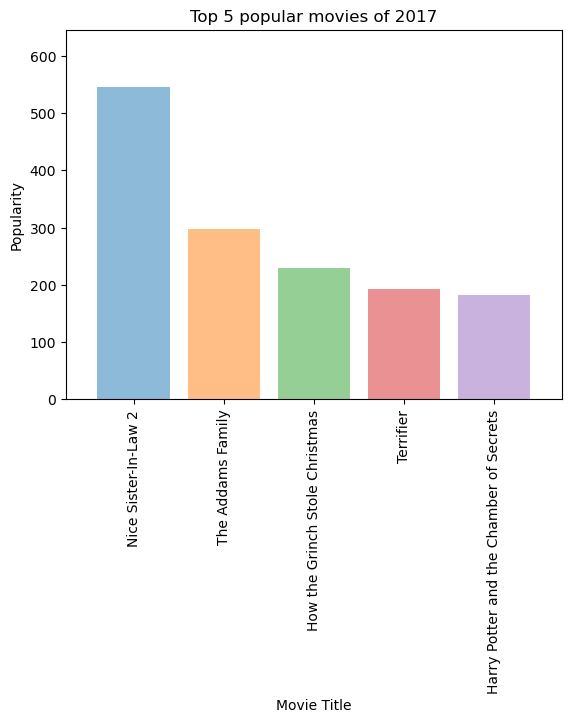

<Figure size 1500x700 with 0 Axes>

In [77]:
users = [545.569,298.037,230.236,192.431,182.003]
x_axis = ["Nice Sister-In-Law 2","The Addams Family","How the Grinch Stole Christmas", "Terrifier", "Harry Potter and the Chamber of Secrets"]
pie_colors = sns.color_palette('tab10')
plt.bar(x_axis, users, color = pie_colors, alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nice Sister-In-Law 2","The Addams Family","How the Grinch Stole Christmas", "Terrifier", "Harry Potter and the Chamber of Secrets"],rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+100)
plt.title("Top 5 popular movies of 2017")
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1/Figures/popularmovies20217.png")
plt.show()

In [27]:
tmdb_precovid = tmdb_precovid_df.year.value_counts()
tmdb_precovid.head(10)

2019.0    2808
2018.0    1967
2017.0    1110
Name: year, dtype: int64

In [33]:
pre_covid = tmdb_precovid.sum()
pre_covid

5885

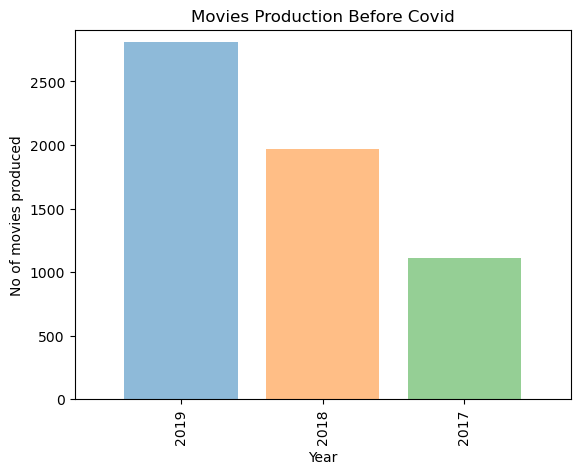

<Figure size 1500x700 with 0 Axes>

In [78]:
users = [2808,1967,1110]
x_axis = ["2019","2018","2017"]
pie_colors = sns.color_palette('tab10')
plt.bar(x_axis, users, color = pie_colors, alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["2019","2018","2017"],rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+100)
plt.title("Movies Production Before Covid")
plt.xlabel("Year")
plt.ylabel("No of movies produced")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1/Figures/popularmoviesbefore.png")
plt.show()

In [36]:
tmdb_covid =tmdb_covid_df.year.value_counts()
tmdb_covid.head(10)

2020    3368
2022    3264
2021    3058
Name: year, dtype: int64

In [37]:
post_covid = tmdb_covid.sum()
post_covid

9690

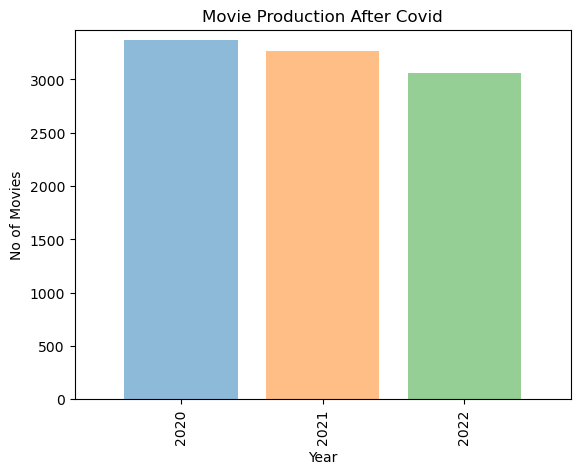

<Figure size 1500x700 with 0 Axes>

In [79]:
users = [ 3368,3264,3058]
x_axis = ["2020","2021","2022"]
pie_colors = sns.color_palette('tab10')
plt.bar(x_axis, users, color = pie_colors, alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["2020","2021","2022"],rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+100)
plt.title("Movie Production After Covid")
plt.xlabel("Year")
plt.ylabel("No of Movies")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1/Figures/popularmoviesafter.png")
plt.show()

In [39]:
Language_count = tmdb_new_df.Language.value_counts()
Language_count.head(10)

English               662
German                 76
French                 70
Spanish, Castilian     58
Portuguese             38
Japanese               32
Tamil                  24
Korean                 23
Italian                19
Chinese                17
Name: Language, dtype: int64

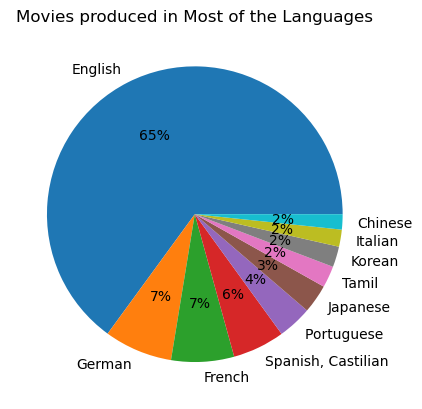

In [80]:
values = [662,76,70,58,38,32,24,23,19,17]
labels = ['English','German','French','Spanish, Castilian','Portuguese ','Japanese','Tamil','Korean','Italian','Chinese']
pie_colors = sns.color_palette('tab10')
plt.pie(values, labels=labels, colors=pie_colors, autopct='%.0f%%', radius=1)
plt.title("Movies produced in Most of the Languages",y=1)
plt.savefig("../project-1/Figures/language.png")
plt.show()